## Inspection of Cleaned and Processed Data

In [2]:
import numpy as np
import mne
%matplotlib inline
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import hmean,trim_mean
import pandas as pd

In [6]:
raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
raw.info
raw.ch_names

Opening raw data file C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif...
This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61)  idle
    Range : 0 ... 1807649 =      0.000 ...  1807.649 secs
Ready.
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.


<ipython-input-6-19523a7a5a0b>:1: RuntimeWarning: This filename (C:\Users\Sammauel\Documents\csc59969\EEG\EEG-Visualization\Inspection\suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")
<ipython-input-6-19523a7a5a0b>:1: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  raw = mne.io.read_raw_fif("suj28_l2nap_day1.fif")


['Fp1',
 'Fz',
 'F3',
 'F7',
 'FT9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'O1',
 'Oz',
 'O2',
 'P4',
 'P8',
 'TP10',
 'CP6',
 'CP2',
 'Cz',
 'C4',
 'T8',
 'FT10',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'FCz',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CPz',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'LOc',
 'ROc']

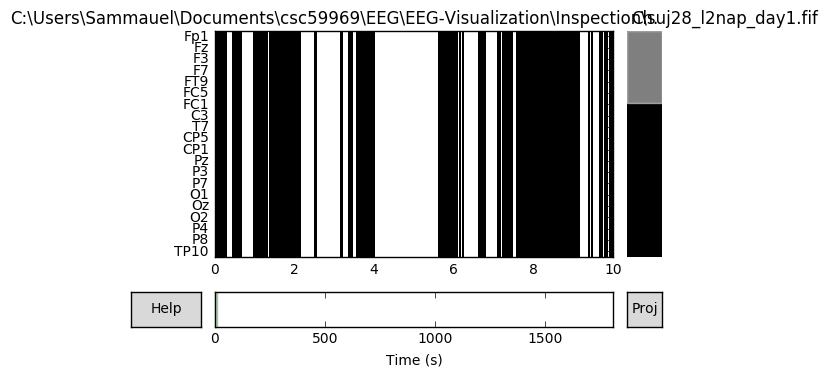

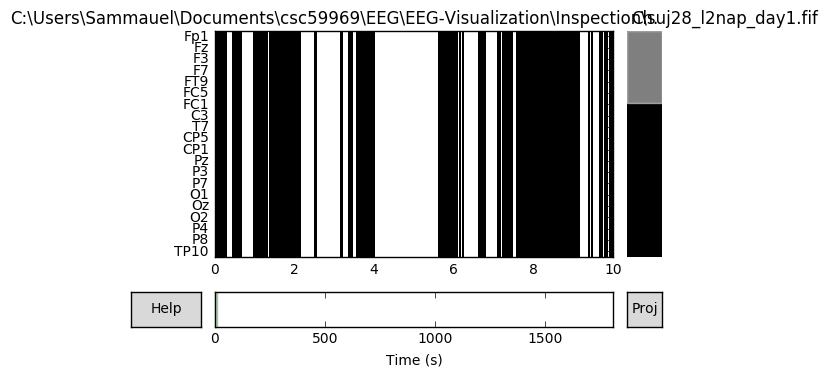

In [8]:
scalingDict=dict(mag=1e-12,grad=4e-11,eeg=20e-6,eog=150e-6,ecg=5e-4,
                 emg=1e-3,ref_meg=1e-12,misc=1e-3,stim=1,
                 resp=1,chpi=1e-4)

raw.plot(start=0.,# initial time to show
         duration=10.0,# time window (sec) to plot in a given time
         n_channels=20,# number of channels to plot at once
         scalings=scalingDict,)# scaling factor for traces. MNE-python documentation

In [12]:
df = raw.to_data_frame()
df.head()

Converting time column to int64...


signal,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,CP5,...,CP4,TP8,C6,C2,FC4,FT8,F6,F2,LOc,ROc
time,,,,,,,,,,,,,,,,,,,,,
0,1.161066e+10,1.485560e+10,1.571328e+10,1.521085e+09,6.582661e+09,-8.905605e+08,1.806909e+10,1.648049e+10,1.323796e+10,1.490602e+10,...,1.697985e+10,3.993158e+09,2.168392e+10,6.382165e+09,1.786672e+10,1.661145e+09,-1.917562e+09,1.673083e+10,2.394019e+10,7.116602e+09
1,1.160938e+10,1.486158e+10,1.571225e+10,1.519124e+09,6.584394e+09,-8.927708e+08,1.807034e+10,1.648447e+10,1.323926e+10,1.490297e+10,...,1.698039e+10,3.990521e+09,2.168501e+10,6.381479e+09,1.786908e+10,1.659955e+09,-1.916956e+09,1.672390e+10,2.392720e+10,7.111475e+09
2,1.160802e+10,1.486765e+10,1.571118e+10,1.517120e+09,6.586319e+09,-8.951473e+08,1.807161e+10,1.648854e+10,1.324058e+10,1.489969e+10,...,1.698095e+10,3.987622e+09,2.168615e+10,6.380727e+09,1.787156e+10,1.658645e+09,-1.916366e+09,1.671651e+10,2.391221e+10,7.102100e+09
3,1.160651e+10,1.487383e+10,1.571004e+10,1.515051e+09,6.588588e+09,-8.978146e+08,1.807290e+10,1.649272e+10,1.324197e+10,1.489604e+10,...,1.698150e+10,3.984258e+09,2.168737e+10,6.379861e+09,1.787426e+10,1.657119e+09,-1.915813e+09,1.670832e+10,2.390801e+10,7.100537e+09
4,1.160482e+10,1.488004e+10,1.570882e+10,1.512928e+09,6.591287e+09,-9.008199e+08,1.807421e+10,1.649699e+10,1.324340e+10,1.489195e+10,...,1.698207e+10,3.980340e+09,2.168867e+10,6.378863e+09,1.787721e+10,1.655334e+09,-1.915321e+09,1.669918e+10,2.391846e+10,7.100244e+09


In [13]:
## To save this as csv run the following

# df.to_csv("suj28_l2nap_day1.csv")
df1 = pd.read_csv("suj28_l2nap_day1.csv")
df1.head()

,time,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,...,CP4,TP8,C6,C2,FC4,FT8,F6,F2,LOc,ROc
0,0,1.161066e+10,1.485560e+10,1.571328e+10,1.521085e+09,6.582661e+09,-8.905605e+08,1.806909e+10,1.648049e+10,1.323796e+10,...,1.697985e+10,3.993158e+09,2.168392e+10,6.382165e+09,1.786672e+10,1.661145e+09,-1.917562e+09,1.673083e+10,2.394019e+10,7.116602e+09
1,1,1.160938e+10,1.486158e+10,1.571225e+10,1.519124e+09,6.584394e+09,-8.927708e+08,1.807034e+10,1.648447e+10,1.323926e+10,...,1.698039e+10,3.990521e+09,2.168501e+10,6.381479e+09,1.786908e+10,1.659955e+09,-1.916956e+09,1.672390e+10,2.392720e+10,7.111475e+09
2,2,1.160802e+10,1.486765e+10,1.571118e+10,1.517120e+09,6.586319e+09,-8.951473e+08,1.807161e+10,1.648854e+10,1.324058e+10,...,1.698095e+10,3.987622e+09,2.168615e+10,6.380727e+09,1.787156e+10,1.658645e+09,-1.916366e+09,1.671651e+10,2.391221e+10,7.102100e+09
3,3,1.160651e+10,1.487383e+10,1.571004e+10,1.515051e+09,6.588588e+09,-8.978146e+08,1.807290e+10,1.649272e+10,1.324197e+10,...,1.698150e+10,3.984258e+09,2.168737e+10,6.379861e+09,1.787426e+10,1.657119e+09,-1.915813e+09,1.670832e+10,2.390801e+10,7.100537e+09
4,4,1.160482e+10,1.488004e+10,1.570882e+10,1.512928e+09,6.591287e+09,-9.008199e+08,1.807421e+10,1.649699e+10,1.324340e+10,...,1.698207e+10,3.980340e+09,2.168867e+10,6.378863e+09,1.787721e+10,1.655334e+09,-1.915321e+09,1.669918e+10,2.391846e+10,7.100244e+09


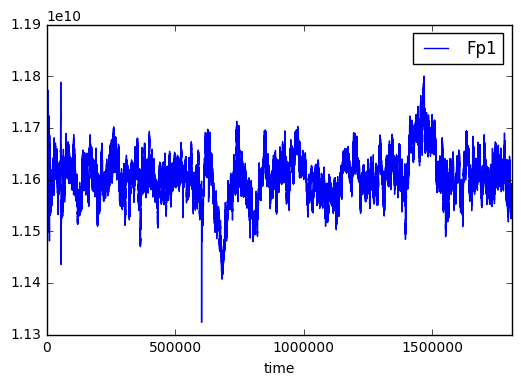

In [15]:
df1.plot(x='time', y='Fp1')

<function matplotlib.pyplot.show>

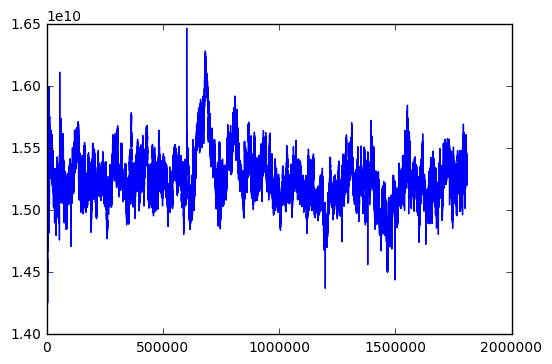

In [17]:
plt.plot(df1['time'],df1['Fz'])
plt.show

## Without realizing it I should try to plot without Pandas as the wrapper and just use matplotlib. What a mess of a mistake